# 本地套接字

- Linux 文件
        b（块设备文件） c（字符设备文件） d（目录） 
        -（普通文件） l（链接） s（套接字） p（管道）

- 作用：用于本地不同的程序间进行通信

- 创建流程
    1. 创建本地套接字
            sockfd = socket(AF_UNIX,SOCK_STREAM)
    2. 绑定本地套接字文件
        - 选定文件**位置和名称**
            sockfd.bind(path)
- 监听  
        listen()
- 消息收发 
        recv  send
        

>        os.path.exists(path)
        功能 ： 判断一个文件是否存在
        参数：目标文件
        返回值 ： 存在返回True 否则 False
       os.remove()  os.unlink()
        功能 ： 删除一个文件
        参数 ： 目标文件


In [ ]:
# 接收端
from socket import *
import os

#确定套接字文件
sock_file = './sock_file'

#判断文件是否已经存在
if os.path.exists(sock_file):
    os.remove(sock_file)

#创建本地套接字
sockfd = socket(AF_UNIX,SOCK_STREAM)

#绑定套接字文件
sockfd.bind(sock_file)

#监听
sockfd.listen(3)

#消息收发
while True:
    c,addr = sockfd.accept()
    while True:
        data = c.recv(1024)
        if data:
            print(data.decode())
            c.send(b"Receive")
        else:
            break 
    c.close()
sockfd.close()


In [ ]:
# 客户端
from socket import * 

#确保通信两端用的是同一个套接字文件
sock_file = "./sock_file"

#创建本地套接字
sockfd = socket(AF_UNIX,SOCK_STREAM)

#连接另一端
sockfd.connect(sock_file)

#收发消息
while True:
    msg = input(">>")
    if msg:
        sockfd.send(msg.encode())
        print(sockfd.recv(1024).decode())
    else:
        break 

sockfd.close()


# 多任务编程
- 定义：通过应用程序利用计算机的多个核心达到同时执行多个任务的目的，一次提高计算机运行效率。
- 
- 意义：充分利用计算机的资源提高程序的运行效率
- 
- 实施方案：**多进程、多线程**
- 
- 并行：多个计算机核心在同时处理多个任务，这时多个任务间是并行关系。
- 并发：同时处理多个任务，内核在多个任务间不断的切换，达到好像都在处理运行的效果。但实际一个时间点内核只能处理其中一个任务。

# 进程（Process）

- 定义：程序在计算机中的一次运行过程

    - 程序：是一个可执行的文件，是**静态**的占有磁盘空间，不占有计算机的运行资源

    - 进程：进程是一个**动态过程**的描述，占有计算机的资源，有一定的生命周期

- 同一个程序的不同运行过程是**不同的进程**，占用资源和生命周期都不一样。

## 进程的创建流程
1. 用户空间通过**运行程序或者调用接口**发起创建进程
2. 操作系统**接受用户请求**，开始创建进程
3. 操作系统**分配计算机资源**，确定进程状态，开辟进程空间等工作
4. 操作系统将创建好的进程提供给应用程序使用

## CPU时间片

- 如果一个进程占有计算机核心，我们称为改进程占有计算机CPU时间片。

***多个任务之间是争夺cpu的关系  
  谁占有cpu最终是操作系统决定***


## PCB（进程控制块）
- 在内存中开辟的一块空间，用来记录进程的信息  
***进程控制块是操作系统查找识别进程的标志***
- 进程信息：ps  -aux

### PID(process ID)
- 在操作系统中每个进程都有一个唯一的ID号用来区别于其他进程。ID号由操作系统自动分配，是一个大于0的整数

### 父子进程 
- 在系统中除了初始化进程，每一个进程都有一个父进程，可能有0个或者多个子进程。由此形成父子进程关系。
- 查看进程树
        pstree
- 查看父进程PID
        ps  -ajx
        
    

## 进程的状态

### 三态
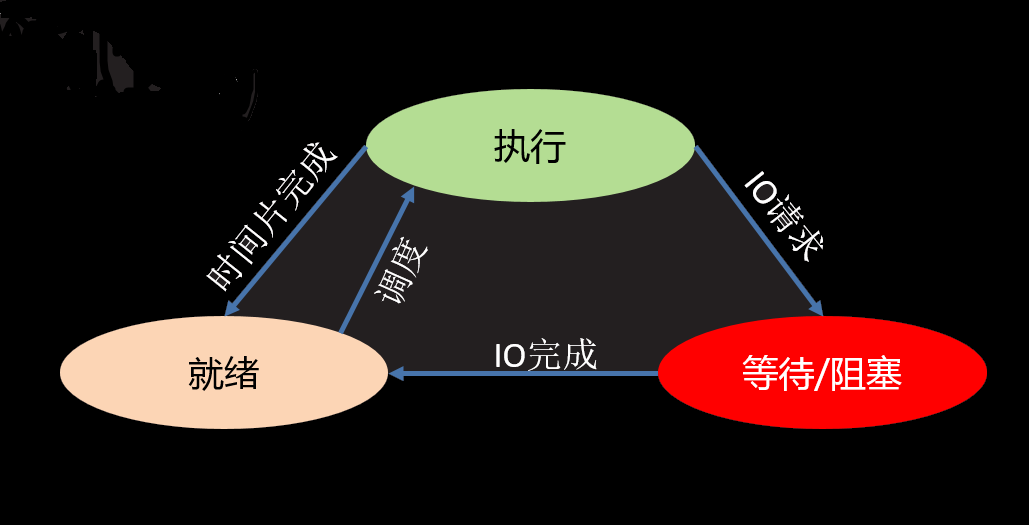
* 就绪态：进程具备执行条件，等待系统分配资源
* 运行态：进程占有cpu处于运行状态
* 等待态：进程暂时不具备执行条件，阻塞等待满足条件后再执行
 
### 五态 （三态基础上增加新建态，终止态）
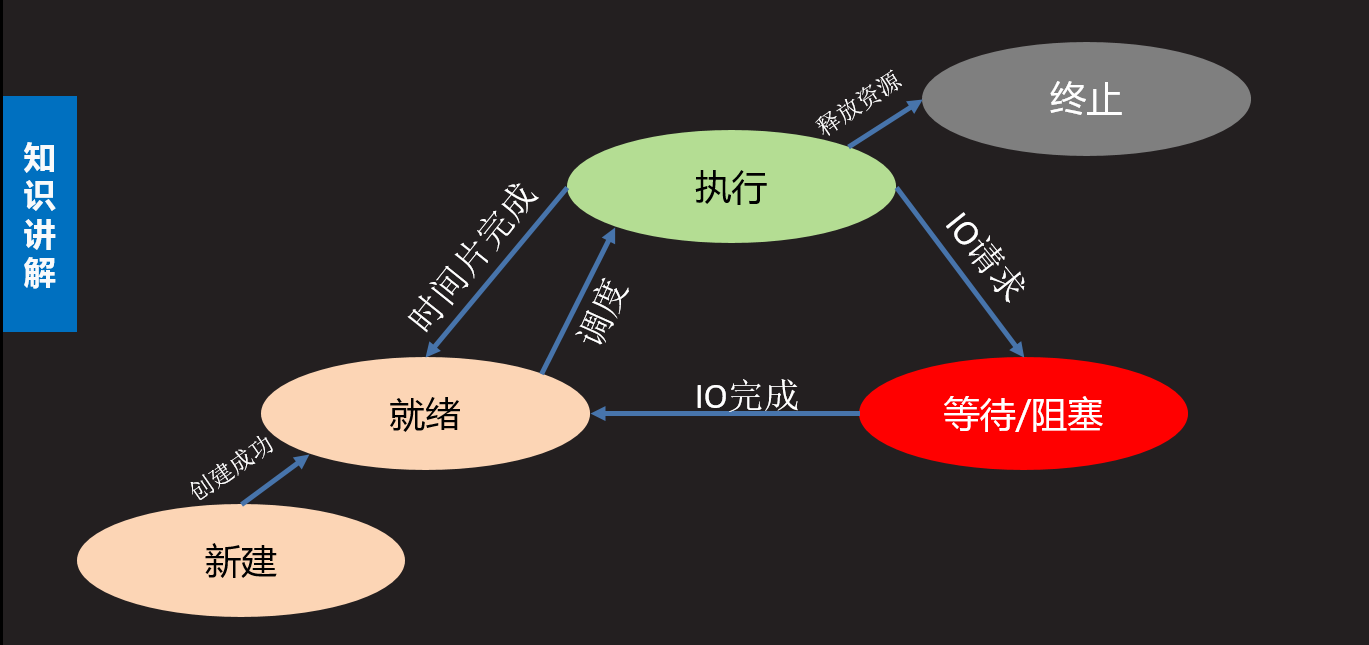
* 新建态：创建一个新的进程，获取资源的过程
* 终止态：进程执行结束，资源释放回收的过程 

### STAT 状态类别

- S  等待态  （可中断等待）
- D  等待态  （不可中断等待）
- T  等待态  （暂停状态）
- R  运行态  （包含就绪态）
- Z  僵尸进程



- < 高优先级进程
- N 优先级较低
- l 有子进程的
- s 会话组组长
- \+ 前台进程

## 进程优先级

- 作用：决定了一个进程的执行权限和占有资源的优先程度

- 查看进程优先级 
        top  动态查看系统中的进程信息， 用<>翻页 
        取值范围  -20 -- 19      -20优先级最高

- 使用指定的优先级运行程序
        nice：指定运行的优先级

        e.g.   nice -9  ./while.py   以优先级9运行
               nice --9  ./while.py  以-9优先级运行

##  进程特征 
1. 进程之间运行**互不影响**，各自**独立运行**
2. 进程是操作系统资源分配的最小单位
3. 每个进程空间独立，各自占有一定的虚拟内存

# 要求  
>1. 什么是进程，进程和程序的区别
2. 了解进程特征
3. 清楚进程每种状态，以及状态之间的转换关系

# 多进程编程

`import  os`

`pid = os.fork()`
- 功能：创建新的进程
- 参数：无
- 返回值： 
    - 失败：返回一个负数
    - 成功：在原有进程中返回新的进程的PID号，在新的进程中返回0

In [ ]:
import os 
from time import sleep

print("*******************")
a = 1

pid = os.fork()

if pid < 0:
    print("创建进程失败")
elif pid == 0:
    print("这是新的进程")
    print("a = ",a)
    a = 10000 # 始终在子进程中运行，不会干扰父进程
else:
    sleep(1)
    print("这是原有进程")
    print("parent a =",a)

print("演示完毕") 

# 至于谁现运行，看谁先抢到时间片

    *******************
    这是新的进程
    a =  1
    演示完毕
    这是原有进程
    parent a = 1
    演示完毕

* 子进程会复制父进程**全部代码段**，包括fork之前产生的**内存空间**
* 子进程从fork的**下一句**开始执行，与父进程互不干扰
* 父子进程的执行顺序是不一定的，父子进程公用一个终端显示
* 父子进程通常会根据fork返回值得差异选择执行不同的代码。所以if结构几乎是fork的固定搭配
* 父子进程空间独立，操作的都是本空间的内容，互不影响
* 子进程也有自己的特性，比如PID号，PCB，命令集等

## 进程相关函数

`os.getpid()`
- 功能：获取当前进程的进程号
- 返回值：返回进程号

`os.getppid()`
- 功能：获取当前进程父进程的PID号
- 返回值：返回进程号

In [4]:
import os
from time import sleep 

pid = os.fork()

if pid < 0:
    print("Create process failed")
elif pid == 0:
    sleep(1)
    #获取当前进程的PID
    print("Child get pid:",os.getpid())
    #获取父进程的PID
    print("Child get parent pid:",os.getppid())
else:
    sleep(1)
    print("parent get child pid:",pid)
    print("parent get pid:",os.getpid())

parent get child pid: 1219
parent get pid: 832
Child get pid: 1219
Child get parent pid: 832


`os._exit(status)`
- 功能：进程退出
- 参数：进程的退出状态

`sys.exit([status])`
- 功能：进程退出
- 参数：数字表示退出状态，不写默认为0，字符串，表示退出时打印的内容

* sys.exit 可以通过捕获 SystemExit异常阻止退出

In [5]:
import os,sys 

#结束进程后不在执行后面内容
# os._exit(0)

try:
    sys.exit("hello world")
except SystemExit as e:
    print("退出:",e)

print("process exit")

退出: hello world
process exit


## 孤儿进程
- 父进程先于子进程退出，此时子进程就称为孤儿进程  
**孤儿进程会被操作系统指定的进程收养，系统进程就成为孤儿进程的新的父进程**

In [ ]:
import os
from time import sleep 

pid = os.fork()

if pid < 0:
    print("Create process failed")
elif pid == 0:
    sleep(1)
    #获取当前进程的PID
    print("Child get pid:",os.getpid())
    #获取父进程的PID
    print("Child get parent pid:",os.getppid())
else:
    print("parent get child pid:",pid)
    print("parent get pid:",os.getpid())

    (base) EnweiHaos-MacBook-Pro:Day4 haoen110$ python fo.py 
    parent get child pid: 1216
    parent get pid: 1215
    (base) EnweiHaos-MacBook-Pro:Day4 haoen110$ Child get pid: 1216
    Child get parent pid: 1
    |

## 僵尸进程
- 子进程先于父进程退出，但是父进程没有处理子进程的退出状态，此时子进程就会成为僵尸进程  
**僵尸进程会存留少量PCB信息在内存中，大量的僵尸进程会消耗系统资源，应该避免僵尸进程产生**

In [ ]:
import os 
from time import sleep 
b
pid = os.fork()

if pid < 0:
    print("create process failed")
elif pid == 0:
    print("Child Process:",os.getpid())
    print("Child process exit")
else:
    print("parent process")
    while True:
        pass

    parent process
    Child Process: 1242
    Child process exit
    haoen110          1242  1241  1241      0    1 Z+   s002    0:00.00 (python3.7)
    

- 写一个聊天室
- 功能 ： 类似qq群聊
1. 进入聊天室需要输入姓名，姓名不能重复
2. 有人进入聊天室会向其他人发送通知
   xxx 进入了聊天室
3. 一个人发消息，其他人会收到消息
   xxx 说 ： xxxxxxxx
4. 某人退出聊天室，其他人也会收到通知
   xxx 退出了聊天室